### Setup

In [31]:
from pycoreimage.pyci import cimg
from pycoreimage.pyci import show
from pycoreimage.pyci import color
import numpy as np
import matplotlib
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = [25,17]
from IPython.core.display import display, HTML
display(HTML("<style>.contatiner {width: 90 % !important; }</style>"))

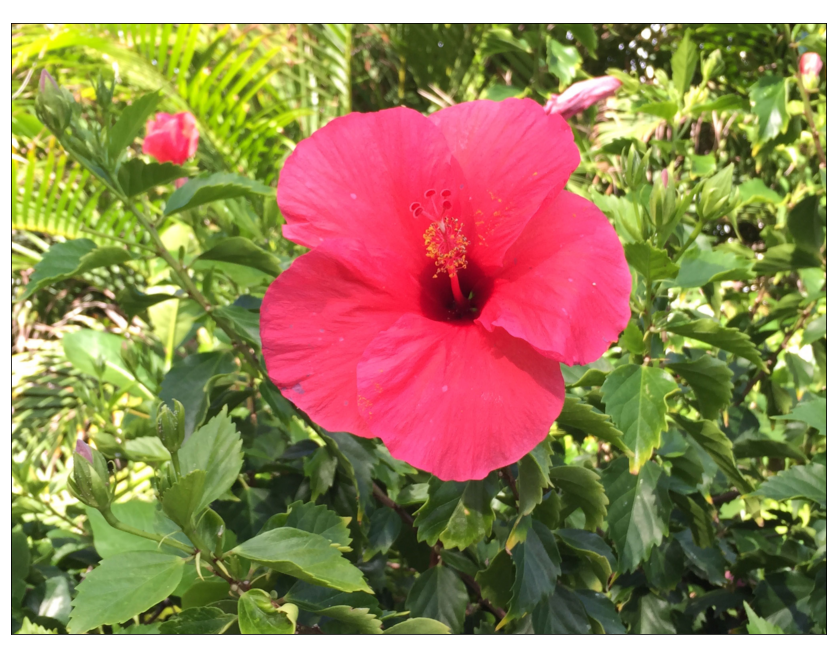

In [32]:

# load an image from file
originImg = cimg.fromFile('./resources/Flowers_1.jpg')
#print(type(originImg))
#print(originImg)
bar = originImg.render() #图片缓存 numpy 表示
show(originImg.render(), title='{}X{}'.format(*originImg.size))

### Core Image filters

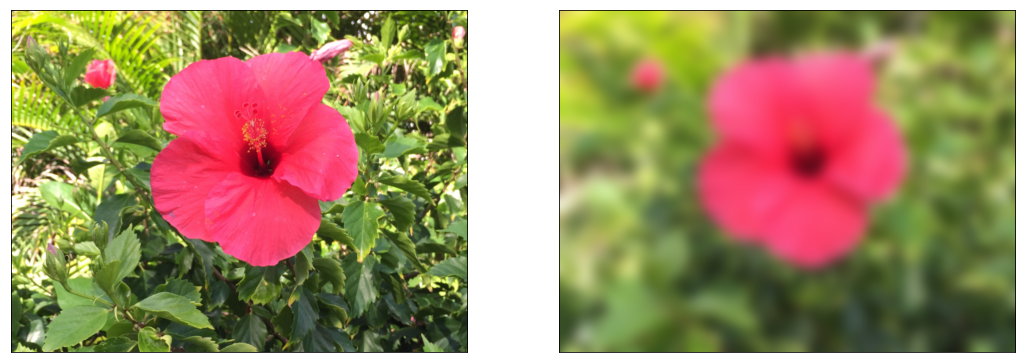

In [33]:
# apply a filter
gaussImg = originImg.gaussianBlur(radius=30)
show([originImg, gaussImg])

In [34]:
 fs = cimg.filters() # build-in filters
 for i, f in enumerate(cimg.filters()):
    print('{:3d} {}'.format(i,f))

  0 CIAccordionFoldTransition
  1 CIAdditionCompositing
  2 CIAffineClamp
  3 CIAffineTile
  4 CIAffineTransform
  5 CIAreaAverage
  6 CIAreaHistogram
  7 CIAreaMaximum
  8 CIAreaMaximumAlpha
  9 CIAreaMinimum
 10 CIAreaMinimumAlpha
 11 CIAreaMinMax
 12 CIAreaMinMaxRed
 13 CIAttributedTextImageGenerator
 14 CIAztecCodeGenerator
 15 CIBarcodeGenerator
 16 CIBarsSwipeTransition
 17 CIBicubicScaleTransform
 18 CIBlendWithAlphaMask
 19 CIBlendWithBlueMask
 20 CIBlendWithMask
 21 CIBlendWithRedMask
 22 CIBloom
 23 CIBokehBlur
 24 CIBoxBlur
 25 CIBumpDistortion
 26 CIBumpDistortionLinear
 27 CICameraCalibrationLensCorrection
 28 CICheckerboardGenerator
 29 CICircleSplashDistortion
 30 CICircularScreen
 31 CICircularWrap
 32 CIClamp
 33 CICMYKHalftone
 34 CICode128BarcodeGenerator
 35 CIColorBlendMode
 36 CIColorBurnBlendMode
 37 CIColorClamp
 38 CIColorControls
 39 CIColorCrossPolynomial
 40 CIColorCube
 41 CIColorCubesMixedWithMask
 42 CIColorCubeWithColorSpace
 43 CIColorCurves
 44 CIColor

In [35]:
cimg.inputs('CIZoomBlur') # filters inputs

{
    "CIAttributeFilterAvailable_Mac" = "10.4";
    "CIAttributeFilterAvailable_iOS" = "8.3";
    CIAttributeFilterCategories =     (
        CICategoryBlur,
        CICategoryStillImage,
        CICategoryVideo,
        CICategoryBuiltIn
    );
    CIAttributeFilterDisplayName = "Zoom Blur";
    CIAttributeFilterName = CIZoomBlur;
    CIAttributeReferenceDocumentation = "http://developer.apple.com/library/mac/documentation/GraphicsImaging/Reference/CoreImageFilterReference/index.html#//apple_ref/doc/filter/ci/CIZoomBlur";
    inputAmount =     {
        CIAttributeClass = NSNumber;
        CIAttributeDefault = 20;
        CIAttributeDescription = "The zoom-in amount. Larger values result in more zooming in.";
        CIAttributeDisplayName = Amount;
        CIAttributeIdentity = 0;
        CIAttributeSliderMax = 200;
        CIAttributeSliderMin = "-200";
        CIAttributeType = CIAttributeTypeDistance;
    };
    inputCenter =     {
        CIAttributeClass = CIVector;
        CIA

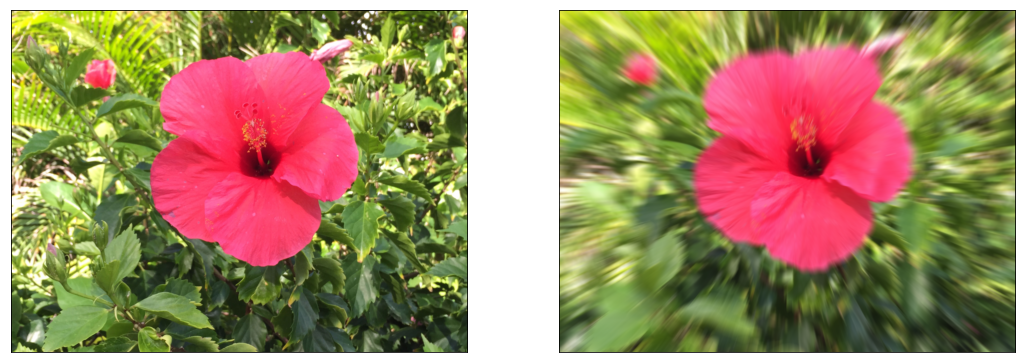

In [36]:
zoomBImg = originImg.zoomBlur(center=[originImg.size[0] / 2,originImg.size[1] / 2],Amount=5)
show([originImg,zoomBImg])


### Core Image Generator

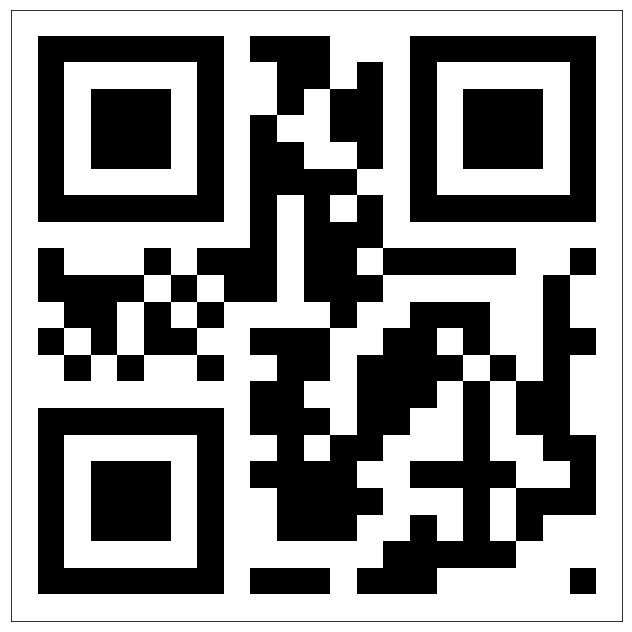

In [37]:
# 生成二维码
qr = cimg.fromGenerator('CIQRCodeGenerator', message='kiss me')
show([qr], interpolation='nearest')

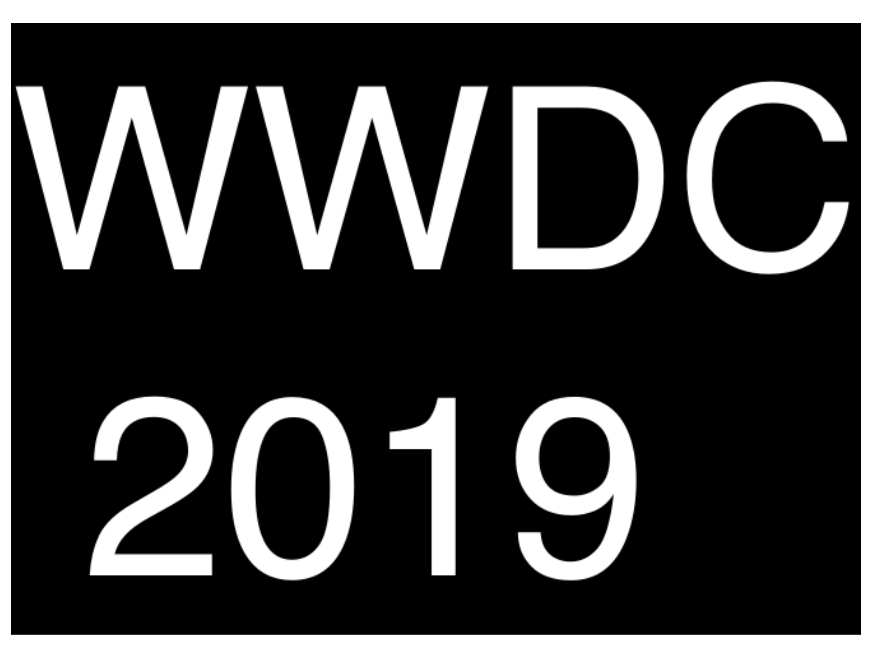

In [38]:
wwdc = cimg.fromGenerator('CITextImageGenerator',
                          text='WWDC\n 2019',
                          fontName='SFHello-Bold',
                          fontSize=400,
                          scaleFactor=1).colorInvert()
show(wwdc.scale(0.5,0.5),title="wwdc")

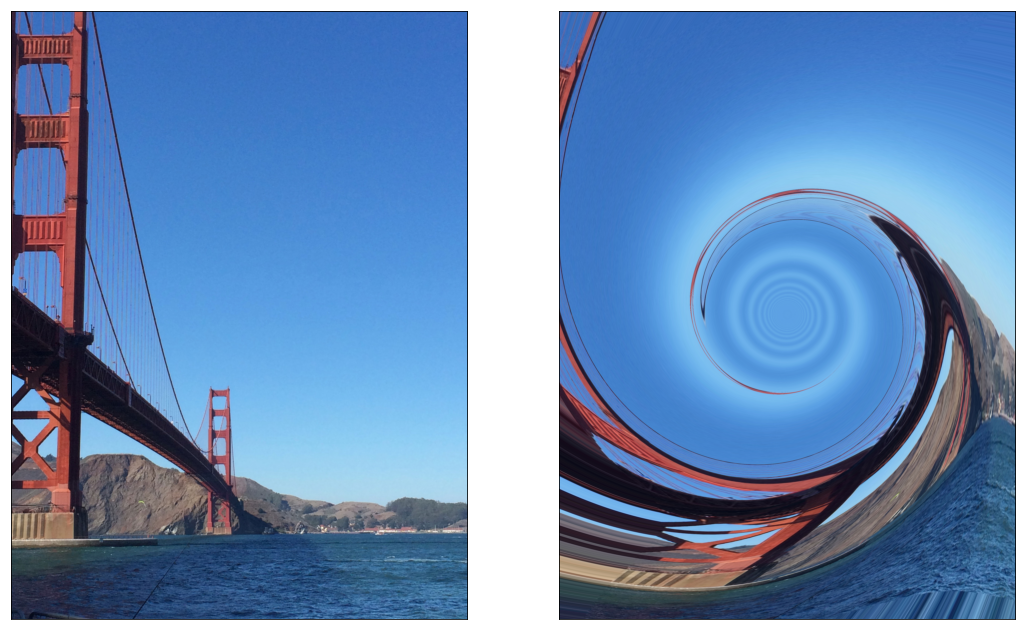

In [39]:
bridge = cimg.fromFile('./resources/GGBridge_2.jpg')
distortion = bridge.vortexDistortion(inputCenter=(bridge.size[0]/2, bridge.size[1]/2), 
                                   radius=bridge.size[0],
                                   angle=4000)
show([bridge,distortion])

In [40]:
ary =  distortion.render()

print('array type', type(ary), ary.shape, ary.dtype)
print('array stats = ', ary.min(), np.percentile(ary, 50), ary.max())

array type <class 'numpy.ndarray'> (3264, 2448, 3) float32
array stats =  0.0 0.46467524766921997 1.0


### Numpy to CoreImge

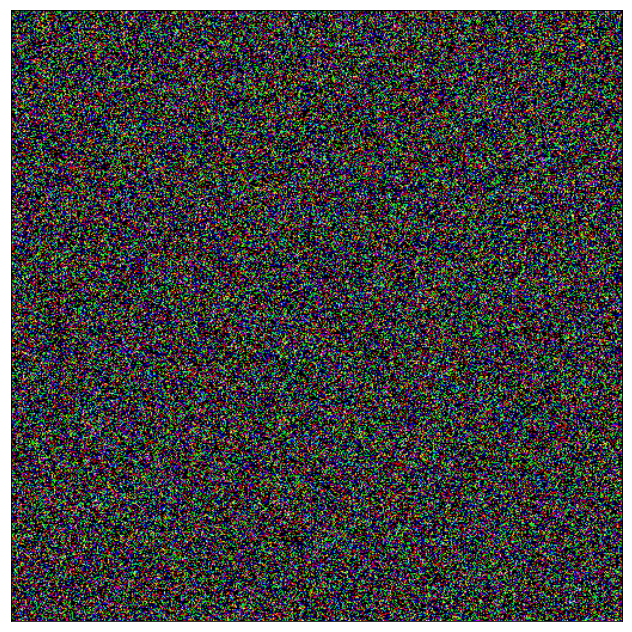

In [41]:
noise = np.random.rand(512,512,3)
noise[noise < 0.75] = 0
show(noise)

In [42]:
noiseImg = cimg(noise)
print(type(noiseImg))
print(noiseImg.ciimage)

<class 'pycoreimage.pyci.cimg'>
<CIImage: 0x7f95870793c0 extent [0 0 512 512]>


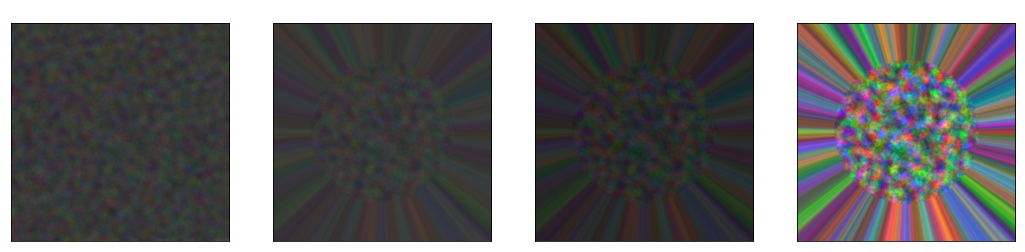

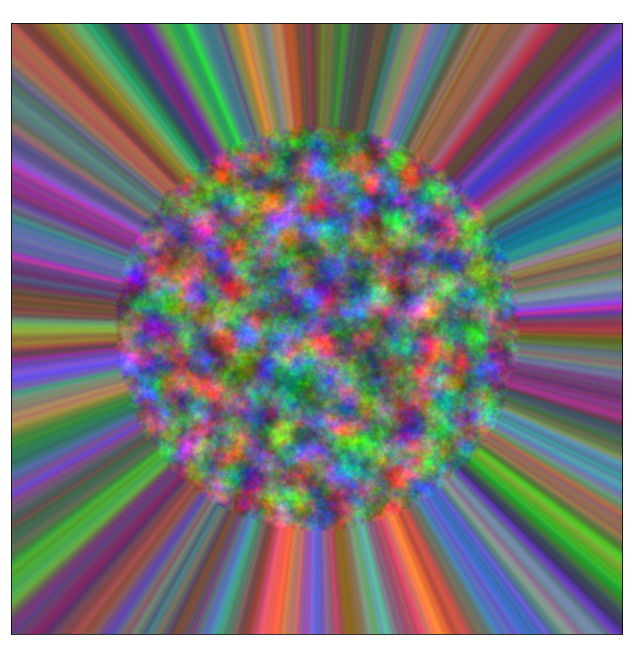

In [43]:
#print([10]*2)
fimg1 = noiseImg.discBlur(radius = 10)
fimg2 = fimg1.lightTunnel(center = [noiseImg.size[0]/2]*2, radius = noiseImg.size[0] / 3)
fimg3 = fimg2.colorControls(contrast = 1.2, saturation = 1.3)
fimg4 = fimg3.exposureAdjust(EV = 2).gammaAdjust(power = 2)
show(fimg1, title = 'disc blur', at = 141)
show(fimg2, title = 'light tunnel', at = 142)
show(fimg3, title = 'color control', at = 143)
show(fimg4, title = 'exposure Adjust', at = 144)
show(fimg4, title = 'Numpy to Core Image')

### Custom kernel

In [139]:
# five tap Laplacian 
#  0  -1   0
# -1  4  -1
#  0  -1   0
source = """ kernel vec4 sharpen(samplers, float amount) {
    vec2 p = destCoord();
    vec4 a = sample(s, samplerTransform(s, p + vec2(-1.0,  0.0)));
    vec4 b = sample(s, samplerTransform(s, p + vec2( 0.0,  1.0)));
    vec4 c = sample(s, samplerTransform(s, p));
    vec4 d = sample(s, samplerTransform(s, p + vec2( 1.0,  0.0)));
    vec3 e = sample(s, samplerTransform(s, p + vec2( 0.0, -1.0)));
    vec4 L = 4.0 * c - a - b - d  - e;
    return vec4(c.rgb + amount * L.rgb, c.a);
} """

sample = cimg.fromFile('resources/SampleImage.jpg');
# result = sample.applyKernel(source,
#                             2,
#                             extent = (255, 500, 256, 256),
#                             roi = lambda index, r: inset(r, -1, -1))
# show([sample, result])

### Putting it all together

In [138]:
a1 = np.zeros((2, 2, 3))
a2  = np.random.rand(2,2,3)
a2Img = cimg(a2)
a2out = a2Img.applyFilter('photoEffectNoir',{})
# label = cimg.fromGenerator('CITextImageGenerator',
#                                text = 'helo',
#                                fontName = 'SFHello',
#                                fontSize = 80,
#                                scaleFactor=1)
# label = label.colorInvert().whitePointAdjust(color = color(1, 0, 0, 1))
# a2out = label.over(a2out)
#print(a1)
#print(a2)
a1[0:1,...] = a2out.render()[0:1,...]
print(a1)
print(a2)

[[[0.88731074 0.88731074 0.88731074]
  [0.5622645  0.5622645  0.5622645 ]]

 [[0.         0.         0.        ]
  [0.         0.         0.        ]]]
[[[0.97523316 0.69518815 0.93105841]
  [0.90893883 0.60464714 0.11075232]]

 [[0.22697058 0.25259221 0.54108268]
  [0.67243187 0.892503   0.37727275]]]


In [ ]:
aircraft = cimg.fromFile('resources/aircraft.png').scale(0.5,0.5)
show(aircraft)

In [51]:
composite = np.zeros((int(aircraft.size[1]), int(aircraft.size[0]), 3))
#print(composite)
rows = aircraft.size[1]

def addBand(i, name, args):
    # apply filter via explicit name and args
    band = aircraft.applyFilter(name, **args)
    #print(band.render())
    # create a label with filter name
    label = cimg.fromGenerator('CITextImageGenerator',
                               text = name,
                               fontName = 'SFHello',
                               fontSize = 80,
                               scaleFactor=1)
    label = label.colorInvert().whitePointAdjust(color = color(1, 0, 0, 1))
    
    # layer text over the image
    lo, hi = i * rows, (i + 1) * rows
    label = label.translate(0.01 * composite.shape[1], composite.shape[0] - hi + (hi - lo) / 2)
    band = label.over(band)
    
    # slice the CIImage here: render only happens in that band 
    print(band.render().shape, type(band.render()))
    composite[lo:hi, ...] = band.render()[lo:hi,...]

In [50]:
addBand(0, 'photoEffectNoir', {})
#addBand(1, 'morphologyMinimum', {'radius': 10})
#addBand(2, 'gaussianBlur', {'radius': 10})
#addBand(3, 'vibrance', {'amount': 8})
#addBand(4, 'pixellate', {'center': (0,0), 'scale': 25})
#show(composite)

(551, 556, 3) <class 'numpy.ndarray'>


TypeError: slice indices must be integers or None or have an __index__ method